In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.shape

(404290, 6)

In [6]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
205501,205501,308669,308670,How does Google know everything?,Is it possible to delete everything that Googl...,0
265333,265333,382286,34656,Is 293 a good score for gre?,Is A score of 319 in GRE a good score?,1
19910,19910,37610,37611,How strict are hostels?,How strict are the hostels in VIT?,0
165116,165116,256451,256452,How do I get good at Minecraft?,How do I get better at Minecraft?,1
4202,4202,8310,8311,I am an engineering student. During my exam da...,Is it normal to sleep for more than 10 hours i...,0


In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255027
1    149263
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

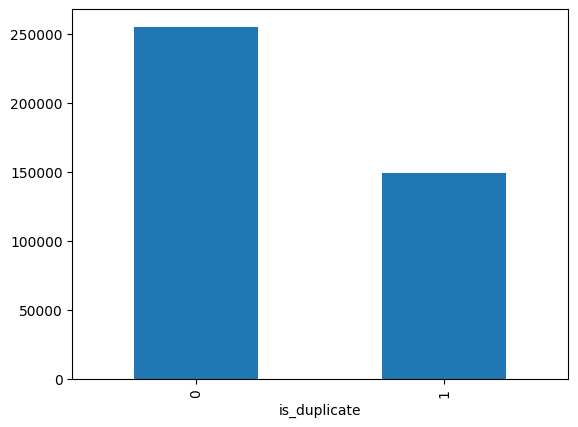

In [10]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions-',np.unique(qid).shape[0])

Number of unique questions- 537933


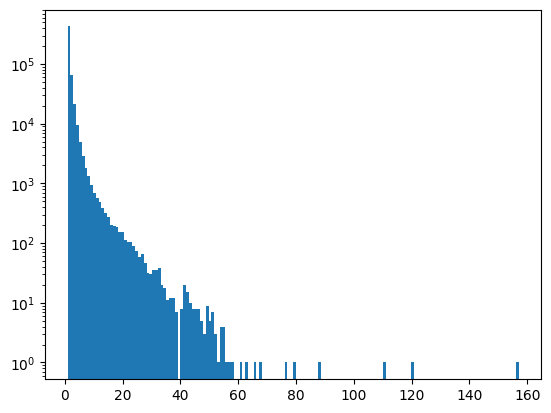

In [12]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [13]:
new_df=df.sample(30000)

In [14]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
new_df = new_df.dropna(subset=['question2'])

In [16]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 233924 to 273498
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [18]:
ques_df=new_df[['question1','question2']]

In [19]:
ques_df.head()

,question1,question2
233924,What are the uses of iPhone?,What do you use your iPhone for?
240940,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...
371221,Who are the richest people in the world?,Who are the richest people in the world and wh...
146536,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...
350406,How can you differentiate between a democracy ...,What is difference between democracy and repulic?


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [21]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [22]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
233924,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
240940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146536,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [24]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
233924,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
240940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146536,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7461666666666666

In [28]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.6 MB/s eta 0:00:00:00:0100:01
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [29]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7461666666666666

In [30]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

<Axes: xlabel='is_duplicate'>

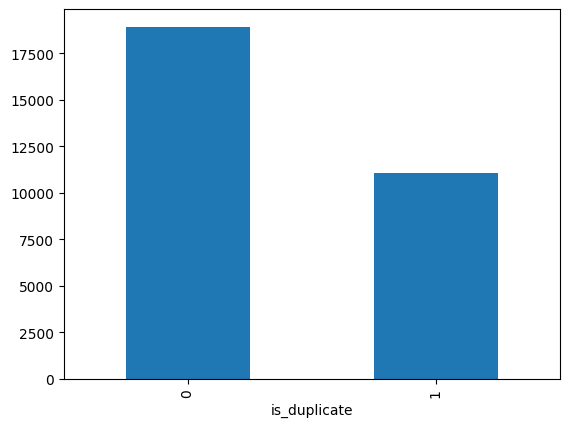

In [31]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [32]:
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of unique questions-',np.unique(qid).shape[0])

Number of unique questions- 55305


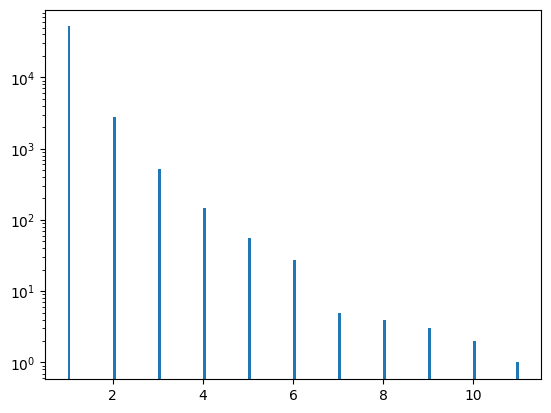

In [33]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [34]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
233924,233924,344292,344293,What are the uses of iPhone?,What do you use your iPhone for?,0,28,32
240940,240940,352865,248783,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...,0,106,88
371221,371221,71069,501837,Who are the richest people in the world?,Who are the richest people in the world and wh...,1,40,60
146536,146536,143078,231443,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...,0,44,149
350406,350406,13617,141286,How can you differentiate between a democracy ...,What is difference between democracy and repulic?,1,69,49


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 233924 to 273498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
 6   q1_len        30000 non-null  int64 
 7   q2_len        30000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.1+ MB


In [37]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [38]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
233924,233924,344292,344293,What are the uses of iPhone?,What do you use your iPhone for?,0,28,32,6,7
240940,240940,352865,248783,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...,0,106,88,19,17
371221,371221,71069,501837,Who are the richest people in the world?,Who are the richest people in the world and wh...,1,40,60,8,13
146536,146536,143078,231443,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...,0,44,149,8,25
350406,350406,13617,141286,How can you differentiate between a democracy ...,What is difference between democracy and repulic?,1,69,49,11,7


In [39]:
def common_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)

In [40]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [41]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
233924,233924,344292,344293,What are the uses of iPhone?,What do you use your iPhone for?,0,28,32,6,7,1
240940,240940,352865,248783,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...,0,106,88,19,17,3
371221,371221,71069,501837,Who are the richest people in the world?,Who are the richest people in the world and wh...,1,40,60,8,13,6
146536,146536,143078,231443,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...,0,44,149,8,25,4
350406,350406,13617,141286,How can you differentiate between a democracy ...,What is difference between democracy and repulic?,1,69,49,11,7,3


In [42]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [43]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
233924,233924,344292,344293,What are the uses of iPhone?,What do you use your iPhone for?,0,28,32,6,7,1,13
240940,240940,352865,248783,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...,0,106,88,19,17,3,33
371221,371221,71069,501837,Who are the richest people in the world?,Who are the richest people in the world and wh...,1,40,60,8,13,6,19
146536,146536,143078,231443,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...,0,44,149,8,25,4,31
350406,350406,13617,141286,How can you differentiate between a democracy ...,What is difference between democracy and repulic?,1,69,49,11,7,3,17


In [44]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
233924,233924,344292,344293,What are the uses of iPhone?,What do you use your iPhone for?,0,28,32,6,7,1,13,0.08
240940,240940,352865,248783,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...,0,106,88,19,17,3,33,0.09
371221,371221,71069,501837,Who are the richest people in the world?,Who are the richest people in the world and wh...,1,40,60,8,13,6,19,0.32
146536,146536,143078,231443,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...,0,44,149,8,25,4,31,0.13
350406,350406,13617,141286,How can you differentiate between a democracy ...,What is difference between democracy and repulic?,1,69,49,11,7,3,17,0.18


minimum characters 2
maximum characters 391
average num of characters 59


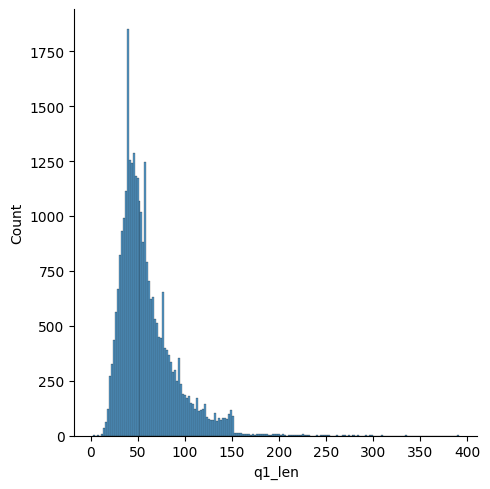

In [45]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 10
maximum characters 540
average num of characters 60


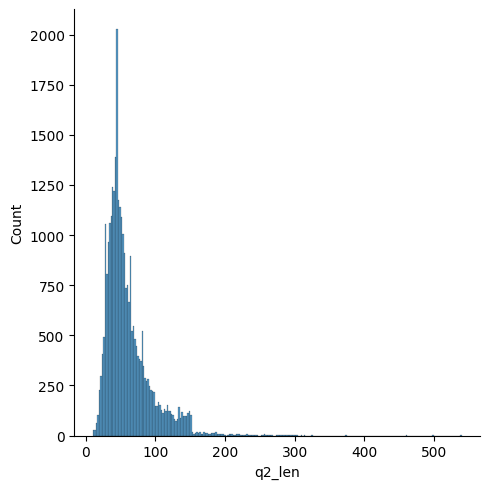

In [46]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 73
average num of words 10


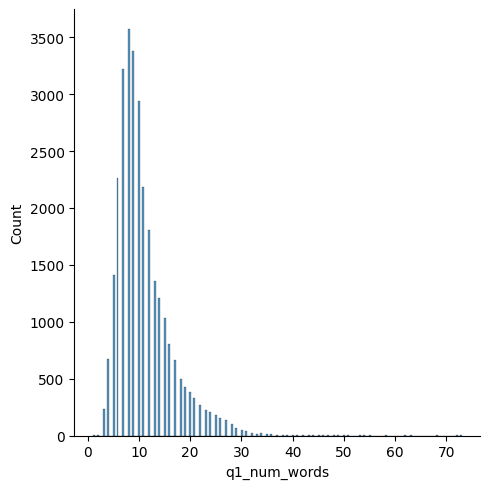

In [47]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 106
average num of words 11


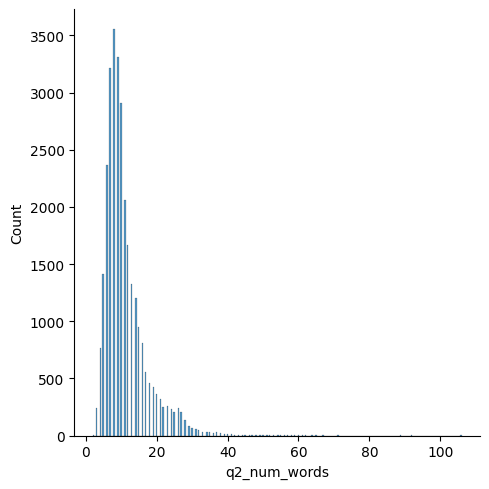

In [48]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

/tmp/ipykernel_3174416/2492214095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
/tmp/ipykernel_3174416/2492214095.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common']

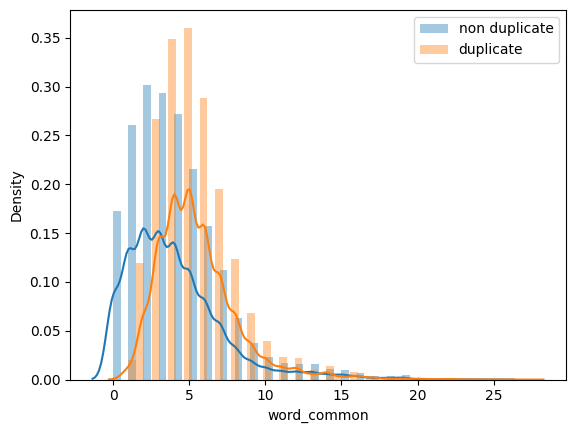

In [49]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipykernel_3174416/2776808923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
/tmp/ipykernel_3174416/2776808923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],l

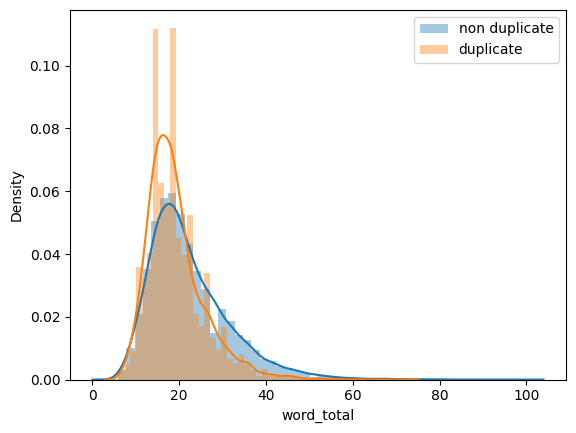

In [50]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

/tmp/ipykernel_3174416/542246512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
/tmp/ipykernel_3174416/542246512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],lab

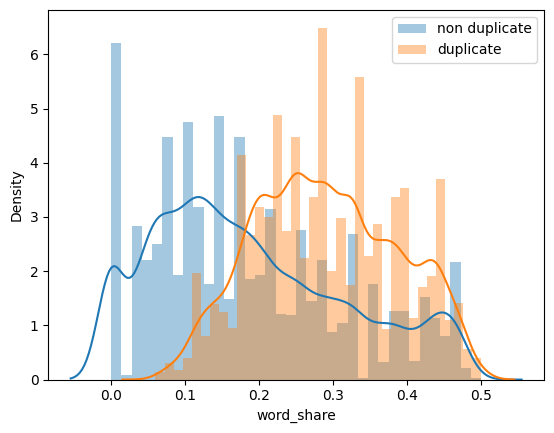

In [51]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [52]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
233924,What are the uses of iPhone?,What do you use your iPhone for?
240940,For the LinkedIn Connection network graph how ...,What are good ways to find all the possible pa...
371221,Who are the richest people in the world?,Who are the richest people in the world and wh...
146536,What are the 11 dimensions in string theory?,Different theories state there are either 10 o...
350406,How can you differentiate between a democracy ...,What is difference between democracy and repulic?


In [53]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
233924,0,28,32,6,7,1,13,0.08
240940,0,106,88,19,17,3,33,0.09
371221,1,40,60,8,13,6,19,0.32
146536,0,44,149,8,25,4,31,0.13
350406,1,69,49,11,7,3,17,0.18


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [55]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [56]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
233924,0,28,32,6,7,1,13,0.08,0,0,...,0,1,0,0,1,0,0,0,0,0
240940,0,106,88,19,17,3,33,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
371221,1,40,60,8,13,6,19,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0
146536,0,44,149,8,25,4,31,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0
350406,1,69,49,11,7,3,17,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7638333333333334

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.761

In [60]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [61]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [62]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [63]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
233924,233924,344292,344293,what are the uses of iphone,what do you use your iphone for,0,28,32,6,7,1,13,0.08
240940,240940,352865,248783,for the linkedin connection network graph how ...,what are good ways to find all the possible pa...,0,106,88,19,17,3,33,0.09
371221,371221,71069,501837,who are the richest people in the world,who are the richest people in the world and wh...,1,40,60,8,13,6,19,0.32
146536,146536,143078,231443,what are the 11 dimensions in string theory,different theories state there are either 10 o...,0,44,149,8,25,4,31,0.13
350406,350406,13617,141286,how can you differentiate between a democracy ...,what is difference between democracy and repulic,1,69,49,11,7,3,17,0.18


In [64]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/palashdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [67]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
233924,233924,344292,344293,what are the uses of iphone,what do you use your iphone for,0,28,32,6,7,...,13,0.08,0.499975,0.499975,0.249994,0.199996,0.333328,0.285710,0,1
240940,240940,352865,248783,for the linkedin connection network graph how ...,what are good ways to find all the possible pa...,0,106,88,19,17,...,33,0.09,0.222220,0.222220,0.333328,0.249997,0.235293,0.210525,0,0
371221,371221,71069,501837,who are the richest people in the world,who are the richest people in the world and wh...,1,40,60,8,13,...,19,0.32,0.999967,0.999967,0.999975,0.499994,0.874989,0.538457,0,1
146536,146536,143078,231443,what are the 11 dimensions in string theory,different theories state there are either 10 o...,0,44,149,8,25,...,31,0.13,0.499988,0.153845,0.749981,0.333330,0.624992,0.199999,0,0
350406,350406,13617,141286,how can you differentiate between a democracy ...,what is difference between democracy and repulic,1,69,49,11,7,...,17,0.18,0.333322,0.249994,0.499988,0.333328,0.428565,0.272725,0,0


In [68]:
!pip install distance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16261 sha256=471e3cfd1c9db17c265d66833d0fec476f3935fa9889185d3c8cd1212115557b
  Stored in directory: /home/palashdas/.cache/pip/wheels/fb/a8/64/6edcab63ec51512a87cacf9b3563c711ad6b7b05d61b704493
Successfully built distance
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [69]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [70]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [71]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
233924,233924,344292,344293,what are the uses of iphone,what do you use your iphone for,0,28,32,6,7,...,0.499975,0.249994,0.199996,0.333328,0.285710,0,1,1,6.5,0.250000
240940,240940,352865,248783,for the linkedin connection network graph how ...,what are good ways to find all the possible pa...,0,106,88,19,17,...,0.222220,0.333328,0.249997,0.235293,0.210525,0,0,2,18.0,0.079545
371221,371221,71069,501837,who are the richest people in the world,who are the richest people in the world and wh...,1,40,60,8,13,...,0.999967,0.999975,0.499994,0.874989,0.538457,0,1,5,10.5,0.975000
146536,146536,143078,231443,what are the 11 dimensions in string theory,different theories state there are either 10 o...,0,44,149,8,25,...,0.153845,0.749981,0.333330,0.624992,0.199999,0,0,17,16.5,0.295455
350406,350406,13617,141286,how can you differentiate between a democracy ...,what is difference between democracy and repulic,1,69,49,11,7,...,0.249994,0.499988,0.333328,0.428565,0.272725,0,0,4,9.0,0.306122


In [72]:
!pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [73]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


In [74]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [75]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
233924,233924,344292,344293,what are the uses of iphone,what do you use your iphone for,0,28,32,6,7,...,0.285710,0,1,1,6.5,0.250000,66,70,59,59
240940,240940,352865,248783,for the linkedin connection network graph how ...,what are good ways to find all the possible pa...,0,106,88,19,17,...,0.210525,0,0,2,18.0,0.079545,31,27,42,45
371221,371221,71069,501837,who are the richest people in the world,who are the richest people in the world and wh...,1,40,60,8,13,...,0.538457,0,1,5,10.5,0.975000,80,100,80,100
146536,146536,143078,231443,what are the 11 dimensions in string theory,different theories state there are either 10 o...,0,44,149,8,25,...,0.199999,0,0,17,16.5,0.295455,25,67,40,75
350406,350406,13617,141286,how can you differentiate between a democracy ...,what is difference between democracy and repulic,1,69,49,11,7,...,0.272725,0,0,4,9.0,0.306122,72,81,71,72


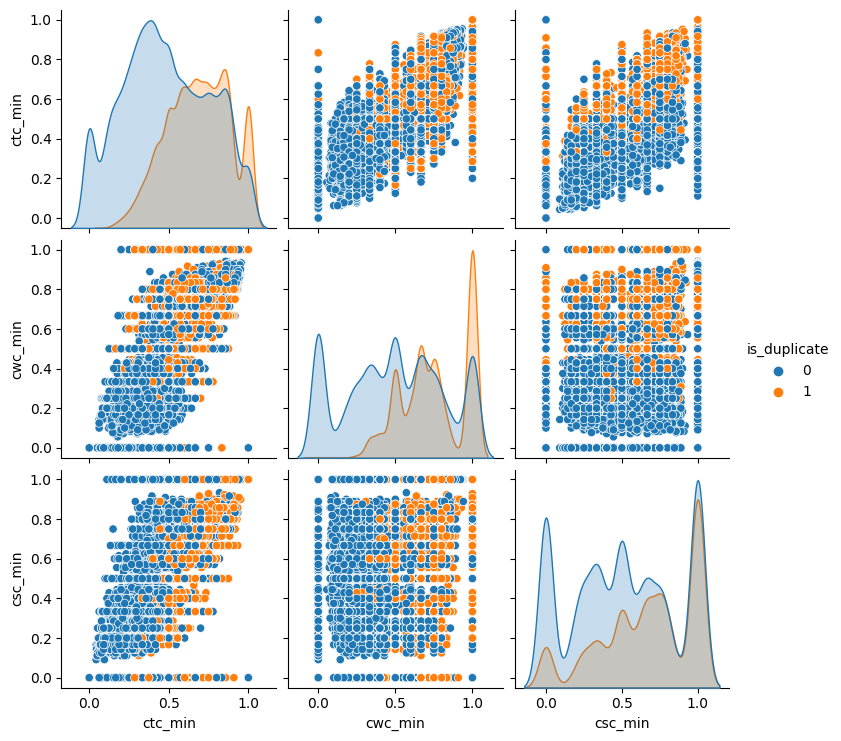

In [76]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

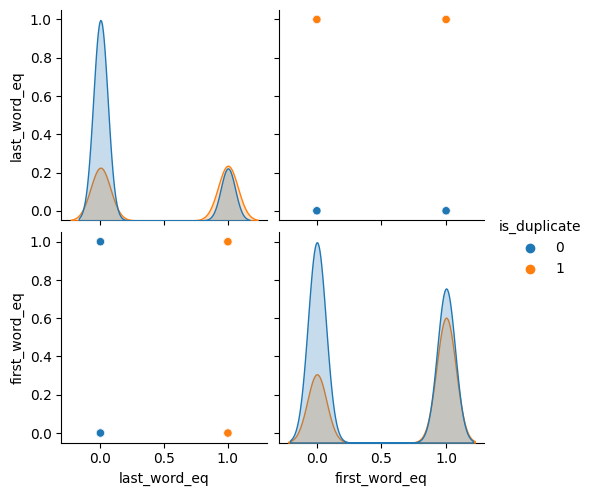

In [77]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [78]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [79]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.061s...
[t-SNE] Computed neighbors for 30000 samples in 3.828s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [80]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.051s...
[t-SNE] Computed neighbors for 30000 samples in 3.821s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [81]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
233924,what are the uses of iphone,what do you use your iphone for
240940,for the linkedin connection network graph how ...,what are good ways to find all the possible pa...
371221,who are the richest people in the world,who are the richest people in the world and wh...
146536,what are the 11 dimensions in string theory,different theories state there are either 10 o...
350406,how can you differentiate between a democracy ...,what is difference between democracy and repulic


In [82]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
233924,0,28,32,6,7,1,13,0.08,0.499975,0.499975,...,0.285710,0,1,1,6.5,0.250000,66,70,59,59
240940,0,106,88,19,17,3,33,0.09,0.222220,0.222220,...,0.210525,0,0,2,18.0,0.079545,31,27,42,45
371221,1,40,60,8,13,6,19,0.32,0.999967,0.999967,...,0.538457,0,1,5,10.5,0.975000,80,100,80,100
146536,0,44,149,8,25,4,31,0.13,0.499988,0.153845,...,0.199999,0,0,17,16.5,0.295455,25,67,40,75
350406,1,69,49,11,7,3,17,0.18,0.333322,0.249994,...,0.272725,0,0,4,9.0,0.306122,72,81,71,72


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [84]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [85]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
233924,0,28,32,6,7,1,13,0.08,0.499975,0.499975,...,0,1,0,0,1,0,0,0,0,0
240940,0,106,88,19,17,3,33,0.09,0.222220,0.222220,...,0,0,0,0,0,0,0,0,0,0
371221,1,40,60,8,13,6,19,0.32,0.999967,0.999967,...,0,0,0,0,0,0,0,0,0,0
146536,0,44,149,8,25,4,31,0.13,0.499988,0.153845,...,0,0,0,0,0,0,0,0,0,0
350406,1,69,49,11,7,3,17,0.18,0.333322,0.249994,...,0,0,0,0,0,0,0,0,0,0


In [86]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [87]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [88]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [89]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [90]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [91]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [103]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the only capital of India?'

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7878333333333334

In [104]:
rf.predict(query_point_creator(q1,q4))

array([1])

In [105]:
rf.predict(query_point_creator(q2,q3))

array([0])